# Sentiment analysis of IMDb movie reviews: a study on features selection & classification algorithms


## **Phuong T.M. Chu, Lan Nguyen and Tu Nguyen**

![](https://i.imgur.com/NjCp49S.png)

## INTRODUCTION:

**IMDb (Internet Movie Database)** is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, fan and critical reviews, and ratings. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon.
By late 1990, the lists included almost 10,000 movies and television series correlated with actors and actresses appearing therein. On October 17, 1990, Needham developed and posted a collection of Unix shell scripts which could be used to search the four lists, and thus the database that would become the IMDb was born.At the time, it was known as the `rec.arts.movies movie database`.
Internet Movie Database users are invited to participate in the site's ever-growing wealth of information by rating movies on a rating scale.
The labeled dataset consists of 50,000 IMDB movie reviews. No individual movie has more than 30 reviews. The 25,000 reviews labeled training set does not include any of the same movies as the 25,000 review test set. 

### *There are three columns in the movie review dataset:*
* Id
*	Review 
*	Sentiment

### *There are two classes in the movie review dataset:*
*	1 : >= 7 rating
*	0: <5 rating

### *This project explores the applicability of machine learning based classification techniques:*
1.	Logistic Regression
2.	Decision Tree
3.	Random Forest 
4.	Gaussian Naïve Bayes & Multinomial Naïve Bayes
5.	K-Nearest Neighbor
6.	SMV – Support Vector Machine

We are going to determine that feature selection improves the performance of sentiment based classification, but it depends on the method adopted and the number of feature selected. The experimental results presented in this project show that Logistic Regression performs better than other techniques for sentiment based classification.


In [2]:
# Import libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./movie_review.csv',sep='\t',encoding='latin-1')

In [4]:
data.sample(5)

id                                             review  sentiment
11534   11282_7  This was the second of the series of 6 \classi...          1
11490  11674_10  The planning episodes were a bit dull, but whe...          1
9662     8510_7  This was the eighth and final Columbia Whistle...          1
9226    2231_10  I have seen \Miracles Still Happen\" now at le...          1
923      4687_8  Lizzie Borden's Love Crimes is an important fi...          1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
id           22500 non-null object
review       22500 non-null object
sentiment    22500 non-null int64
dtypes: int64(1), object(2)
memory usage: 527.4+ KB


In [6]:
data['sentiment'].value_counts()

1    11278
0    11222
Name: sentiment, dtype: int64

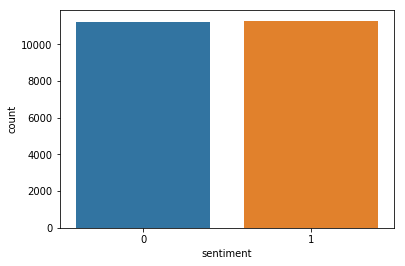

In [7]:
sns.countplot(x='sentiment',data = data)
plt.show()

We have a balanced dataset with **11,278 labeled 1** observations and **11,222 labeled 0** observations.

## Step 1: Data Clean up

In [53]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [54]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

## Step 2: Representation

In [55]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

from sklearn.model_selection import train_test_split

X = data['review'] 
y = data['sentiment']

my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)

In [57]:
X_train 

<15750x50478 sparse matrix of type '<class 'numpy.float64'>'
	with 1465529 stored elements in Compressed Sparse Row format>

## Step 3: Classification

We train our algorithm by several models

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))


The accuracy score is: 0.884
The confusion matrix is: 
 [[2932  476]
 [ 307 3035]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      3408
           1       0.86      0.91      0.89      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.89      0.88      0.88      6750



### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
dtc_predictions = dtc.predict(X_test)

In [63]:
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.7088888888888889
The confusion matrix is: 
 [[2416  992]
 [ 973 2369]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      3408
           1       0.70      0.71      0.71      3342

   micro avg       0.71      0.71      0.71      6750
   macro avg       0.71      0.71      0.71      6750
weighted avg       0.71      0.71      0.71      6750



### Random Forest

**Baseline Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfc_predictions = rfc.predict(X_test)

In [52]:
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.732
The confusion matrix is: 
 [[2770  638]
 [1171 2171]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      3408
           1       0.77      0.65      0.71      3342

   micro avg       0.73      0.73      0.73      6750
   macro avg       0.74      0.73      0.73      6750
weighted avg       0.74      0.73      0.73      6750



**Tunning Model**

[0.6170171095453064, 0.7131426685889863, 0.7486354587274427, 0.7685081726558053, 0.7858409381345307, 0.8015879134999322, 0.8200634876867148, 0.83790503606379, 0.844761852517005, 0.8457144512624327, 0.8526351346731532]


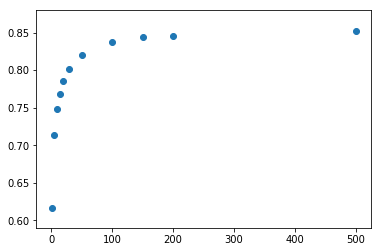

In [0]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150, 200, 500]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, X_train, y_train,cv=3).mean())
    
plt.scatter(n, val_results)
print(val_results)

In [0]:
final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

In [0]:
print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.8428148148148148
The confusion matrix is: 
 [[2797  571]
 [ 490 2892]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3368
           1       0.84      0.86      0.84      3382

   micro avg       0.84      0.84      0.84      6750
   macro avg       0.84      0.84      0.84      6750
weighted avg       0.84      0.84      0.84      6750



### Gaussian Naive Bayes

**Gaussian Naive Bayes** is a good classification for text. The asumption is that the features follow the Gaussian distribution (normal distribution). We do not achive good model because our data's features do not follow the Gaussian distribution.

In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.8622222222222222
The confusion matrix is: 
 [[2953  455]
 [ 475 2867]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      3408
           1       0.86      0.86      0.86      3342

   micro avg       0.86      0.86      0.86      6750
   macro avg       0.86      0.86      0.86      6750
weighted avg       0.86      0.86      0.86      6750



In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train.toarray(), y_train)

gnb_predictions = gnb.predict(X_test.toarray())

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.6687407407407407
The confusion matrix is: 
 [[2567  841]
 [1395 1947]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      3408
           1       0.70      0.58      0.64      3342

   micro avg       0.67      0.67      0.67      6750
   macro avg       0.67      0.67      0.67      6750
weighted avg       0.67      0.67      0.67      6750



### KNN (K Nearest Neighbors)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

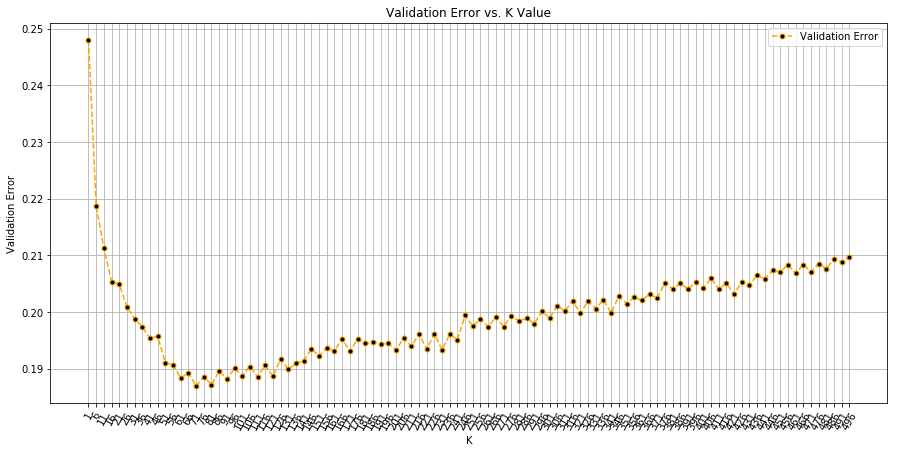

In [0]:
### Tuning using K-fold Cross Validation

from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,500,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [0]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

71

The accuracy score is: 0.8065185185185185
The classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      3384
           1       0.80      0.81      0.81      3366

   micro avg       0.81      0.81      0.81      6750
   macro avg       0.81      0.81      0.81      6750
weighted avg       0.81      0.81      0.81      6750



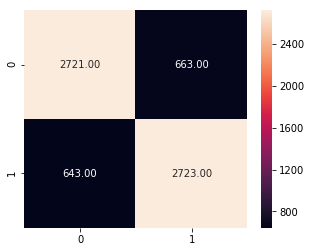

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

### SVM (Support Vector Machine)

In [21]:
from sklearn.svm import SVC

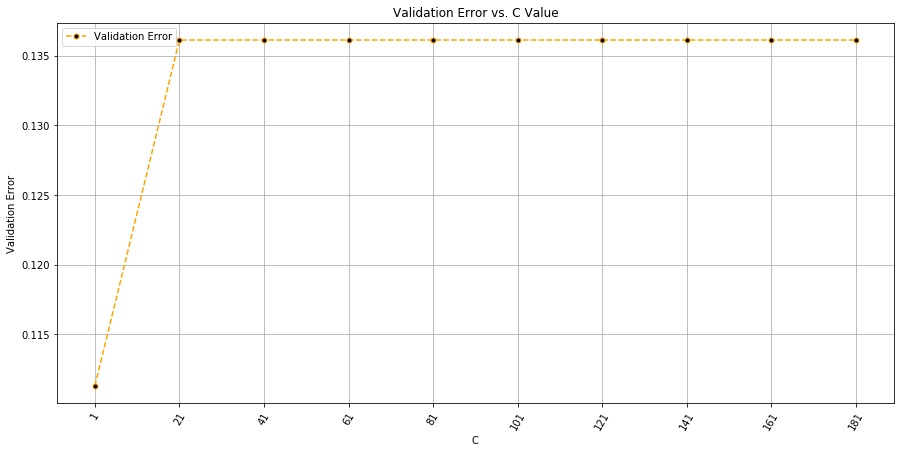

In [0]:
from sklearn.model_selection import cross_val_score

val_rate = []
c_range =  range(1,200,20)

for i in c_range:
    
    svm = SVC(C=i, kernel='linear')
    
    val_error = 1 - cross_val_score(svm, X_train, y_train,cv=5).mean()
    val_rate.append(val_error)


# Plot settings
plt.figure(figsize=(15,7))
plt.plot(c_range, val_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(c_range.start, c_range.stop, c_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [0]:
best_c = c_range[val_rate.index(min(val_rate))]
best_c

**Perform SVM with C = 1 and C = 3**

In [22]:
svm = SVC(kernel='linear',C=1).fit(X_train, y_train)

In [23]:
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
pred = svm.predict(X_test)

In [25]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8814814814814815
The confusion matrix is: 
 [[2965  443]
 [ 357 2985]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3408
           1       0.87      0.89      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



In [26]:
svm = SVC(kernel='linear',C=3).fit(X_train, y_train)

In [27]:
svm.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
pred = svm.predict(X_test)

In [29]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8765925925925926
The confusion matrix is: 
 [[2970  438]
 [ 395 2947]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      3408
           1       0.87      0.88      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



## Step 4: Performing Features Selection
### Selecting features by Chi2

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold

# Reshape X_train, X_test by fit_transform
X_new_train = SelectKBest(chi2, k=45000).fit_transform(X_train, y_train)
X_new_test = SelectKBest(chi2, k=45000).fit_transform(X_test, y_test)

# Build Logistic Regression Model and check accuracy
clf.fit(X_new_train, y_train)

new_predictions = clf.predict(X_new_test)

print('The accuracy score is:',accuracy_score(y_test,new_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,new_predictions))
print('The classification report is:','\n',classification_report(y_test,new_predictions))


The accuracy score is: 0.7644444444444445
The confusion matrix is: 
 [[2591  817]
 [ 773 2569]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      3408
           1       0.76      0.77      0.76      3342

   micro avg       0.76      0.76      0.76      6750
   macro avg       0.76      0.76      0.76      6750
weighted avg       0.76      0.76      0.76      6750



We tried to perform Features Selection for the dataset, however, this step doesn't improve the accuracy because it can accidently remove important words

### Manually selecting features
We investigate which words negatively affected the accuracy and add those words to the `stop words`

In [0]:
my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

import nltk

# Add tag to word inside the vectorized dictionary
Pos_tag = nltk.pos_tag(tfidf.vocabulary_.keys())

# Create dataframe of words and words's tags
word_bag = pd.DataFrame(Pos_tag, columns = ['Word' , 'Type'])

# We focus on word with tag NN (Nouns)
NN_list = word_bag['Word'][word_bag['Type']=='NN'].tolist()

remove_word = []
X = data['review']
y = data['sentiment']

for word in NN_list:
    my_additional_stop_words.append(word)
    stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    
    tfidf = TfidfVectorizer(stop_words=stop,
                            tokenizer=tokenizer_porter,
                            preprocessor=preprocessor)

    X_tfidf = tfidf.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3,random_state = 101) 
    
    # Build logistic Regression Model
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Check if the accuracy of the model improved after removing the word
    # The accuracy of model is 0.884 for random_state = 101
    if accuracy_score(y_test,predictions) < 0.884:
        remove_word.append(word)
        print(word)
        my_additional_stop_words = []
    else:
        my_additional_stop_words = []

After that step, we get the list of words that can be removed in order to improve the accuracy of Logistic Regression Model.



## Step 5: Improving Model by adding more stop words

### Logistic Regression Model

In [44]:
my_additional_stop_words = ['addit','agent','agre','amateur','ambit','anim','area','ate','attack','attent',
                            'averag','babe','baffl','bare','barrel','base','batonzilla','battl','bayreuth',
                            'bc','beast','beatnik','bell','biographi','bisexu','bit','blood','bloodi','bo',
                            'book','buddi','camilla','car','carnivor','carradin','chainsaw','charact','chill',
                            'cinema','cliff','comput','conduct','conductor','consent','continu','crocus',
                            'cruis','cruso','danger','dangl','deadli','deadlier','deal','deliv','dna','dodg',
                            'doesn','don','door','doubl','drama','drug','dub','dude','dure','e','earth',
                            'effect','element','endur','enter','escap','everyon','excit','exclud','expedi',
                            'exposur','fact','fare','fashion','fatigu','fearsom','featur','fenc','fight',
                            'fist','flaccid','follow','food','genit','georg','giant','girl','glare','grace',
                            'gratuit','guilti','gurnemanz','h','haiduk','half','harrow','heard','hickox',
                            'hine','histor','hmmm','hollywood','hooray','hope','howev','idea','imagin',
                            'impati','integr','investor','iron','jackson','jame','joe','john','jordan',
                            'jurassik','justif','keith','knappertsbusch','lack','larg','laughter','length',
                            'lord','lot','lousi','lugubri','lush','manag','mani','match','mate','mayb',
                            'mention','michael','middl','miller','moment','monsalvat','moonwalk','motion',
                            'mr','mutat','nichola','occasion','opera','orchestr','overheard','overlook',
                            'pack','paralyt','park','parkă','parsif','pastur','perceiv','perform','pesci',
                            'piec','plan','planet','player','possess','power','prais','predat','prey',
                            'primal','project','quit','rais','react','record','recreat','relationship',
                            'rememb','remot','represent','resembl','result','rhi','rip','robert','robinson',
                            'roland','roxann','s','sabretooth','saint','scene','scientist','seriou','sever',
                            'shortcom','sibl','singer','slightli','smilodon','someon','speed','splice','staci',
                            'stage','stalk','star','stare','stir','strait','studio','superbl','swan',
                            'syberberg','talent','tempi','terrifyingli','themselv','thi','tiger','timothi',
                            'towel','transcend','transmut','trashi','tricksi','trumpet','turf','vanessa',
                            'version','victim','vigor','violent','visitor','voic','voltag','wall','war',
                            'watch','way','wholesom','wimmer','wiz','work','world','youngster','slaughter',
                            'mommi','daddi','friendli','smuggler','custodi','train','expert','lift',
                            'valuabl','diamond','coincident','life','littl','fun','time','beat','whatev',
                            'violenc','magnific','grotesqu','20','2002', '10', '000', '2006', '1951', '80', 
                            '4', '5', '1', '50', '3000', '1980', 
                            '1983', '3', '1978', '70', '2022', '7', '1939', '1880', '1985', '0', '89', '1986',
                            'zuniga', '15', '600', '93', '300', '9', '95', '29', '75', '1933', '87', '2000', 
                            '17', '166', '6', '30', '8', '60', '2007',  '45', 
                            '147', '145', '90', '1968', '1960', '1930', '1988', '2004', '1938', '2', '1996', 
                            '101', '40', '3d', '2d', '1957', '100', '1950', '1600', '14', '88', 'seven', '117',
                            'zone', '11', '1958', '1959', '1991', '1976', '19th', '1800', '1998', '1999', '99',
                            '747', '16', '71', '21st', '1970', '2038', '18', '64', '34', '79', '1965',
                            '1973', '1961', '1992', '1984', '35', '12', '1969', '42nd', '007', '2005', '1935',
                            '1st', '1934', '1936', '1937', '25yo', '41', '27', '25', '65m', '04', '112', 
                            '18th', '1971', '1994', '1990', '1944', 
                            '1974', '1972', '28', '1982', '2008', '77', '26', '48', 'zurich', '1997', '2017', 
                            '110', '2046', '36', '5000', '1989', '1931', '1977', '1979', '1993', '950', '108',
                            '272', '273', '1941', '7ã', '1948', '14th', '24', '3rd', '4th', '200', '1975', 
                            '2009', '51', '201', '9000', '1995', '92nd', '1907', '1924', '120', '00', '39', 
                            '92', '750', '6th', '103', '400', '1000', '660', '1830', '03', '09', '1945', '4f',
                            '241', 'zippo', '1956', '1981', '82', '85', '1ã', '01', '150', '97', '666', '2001',
                            '1954', '49', '90min', '7day', '1sound', '84', '16ã', '1928', '5539', '1942', 
                            '1886', '1895', '249', '275', '222', '999', '001', '100yard', '1943', '1940', 
                            '42', '4o', '2035', '22', '1963', '15th', '800', '83', '1920', '1966', '74', 
                            '12m', '1967', '35mm', '70mm', '1914', '1946', '8th', '54', '76', '2010', '23', 
                            '1962', '2nd', '14ai', '106min', '78', '1500', '4h', '138', '8mm', '1898', '850', 
                            '1050', '1947', '109', '1955', '1949', '1953', '250', '104', '33', '1919', '2003',
                            '56', '07', '163', '700', '1832', '37', '1200', '25th', '94', '7th', '360',
                            '4000', '52', '2006parsif', '24year', '225min', '330min', '849', '2040', '5th', 
                            '94th', '00pm', '08', '06', '00015', '10mi', '21', '225', '10rate', '12th', 
                            '1952', '8ã', '1904', '2019', '72nd', '111', '6k', '4k', '2k', '28th', '106', 
                            '102', '102nd', '713', '1926', '157', '86', '47', '46', '59', '66', '3k', '1881',
                            '1300', '9th', '02', '1910', '500', '65', '1918', '1865', '1932', '170', '98', 
                            '1922', '17th', '27th', '73', '1876', '55', '107', '911', '5ã', '4ã', '3ã', '2ã',
                            '50ã', '1874', '19', '16mm', '1909', '68', '1900', '180', '11th', '139', '2am', 
                            '1987', '15minut', '25min', '500lb', '90210', '1840', '135', '31', '58', '74th', 
                            '05', '53', '2036', 'zabriski', '10pm', '8p', '1692', '1929', '70i', '44', '1925',
                            '1912', '40th', '7ft', '1454', '300mln', '1408', 'orland', '45am', '14a', '1hr',
                            'zhi', '96', '25million', '1864', '16x9', '105', '128', '041', '35th', '480p', 
                            '84f', '8u', '11f', 'msft3000', '2500', '43', '67', '63', '12383499143743701', 
                            '4am', '9pm', '38th', '2hr', '2480', '2400', '1915', '34th', '357', '32', '2020', 
                            '4kid', '2600', '5x5', '1000lb', '469', '3am', '1hour', '69', '1700', '1870', 
                            '60ti', '2007ã', '183', '1988ã', '116', '14afear', '88min', '1200f', '16th',
                            '1836', '20yr', '1794', '140', '5hr', '1927', '3x5', '2210', '31st', '10mil',
                            '1805', '38', '7mm', '1873', '618', '502', '1964', '80yr', '637', '1850', '1853', 
                            '91', '1917', '29th', '204', '475', '130', '160', '149', '72', '7ish', '8k', 
                            '270', '10p', '607', '100th', '500db', '90ish', '1862', '10voluntarili', '1492',
                            '100mph', '900', '1894', '10yr', '262', 'zebbedi', '9am', '131', '5yo', '58th',
                            '75054', '320x180', '737', '1890', '1887', '132', '50th', '707', '1970i', '60i', 
                            '80i', '48hr', '576', 'zukor', '1921', '345', '51st', '1903', '1916', '20minut', 
                            '1905', '1138', '38k', '19796', '192', '125m', '740il', '10line', '3a', '62', 
                            '100x', '1863', '20m', '30k', '2090', '66er', '2hour', '10www', '30min', '1775', 
                            '171', '230lb', '160lb', '105lb', '70th', '2031', '23rd', '10eliason', '10th', 
                            '61', '278', '401k', '1896', '1899', '18137', '100m', '81', '168', '1888', '350', 
                            '236', '101st', '372', '220', '6b', '99p', '137', '16iem', '69th', '1h30', 
                            '250000', '237', '21849890', '2012', 
                            '00am', '3yr', '285', '356', '1p', '20001', '53m', '57', '510', '511', '512', 
                            '513', '1846', '79th', '1100ad', '1913', '30someth', '95th', '029', '087', '477',
                            '9mm', '2013', '99ã', '55th', '15ã', '2200', '1415', '1s', '1318', '10the', 
                            '10hulkamaniac', '24th', '1816', '2257', '19k', '1h40m', '1100', '2000sdri', 
                            '1d', '22d', '23d', '1809', '1837', '1902', '274', '1824', '006', '10fifth', 
                            '10sixth', '2008veri', '197', '98minut', '5yr', '10peac', '4rove', '99cent', 
                            '125', '10i', '114', '210', '1854', '1855', '1838', '1800mph', '20000', '177', 
                            '598947', '127', '2pac', '7eventi', '5ive', '740', '50min', '10min', '6pm', 
                            '1906', '214', '1984ish', '1930sstereotyp', '30lb', '1860', '2050', '10qualiti', 
                            '3012', '788', '1tv', '571', '6000', '26th', '1850i', '003830', '498', '5200', 
                            '6723', '22101', '02i', '9999', '240', '35yr', '40min', '1594', '5million', 
                            '336th', '12a', '2x4', '5x', '30am', '18aeddi', '10x', '00001', '4x', '45min', 
                            '2i', '1798', '1911', '451', '1701', '01pm', '146', '0f', 
                            '1892', '1897', '100min', '2047', '4d', '465', '905', '10molli', '22nd', 
                            '332960073452', '1861', '300ad', '819', '20k', '1820', '3462', '1202', '1201',
                            '123', '18a', '1a',  '974th', '60th', '1901', '735', '209', '21699',
                            '221', '0079', 'zaku', '0080', '0083', '500ad', '914', '2080', '2070', '1h53', 
                            '269', '4m', '4w', '175', '158', '18ai', '10minut', '6200', '39th', '2054', 
                            '9484', '3516', '13k', '917', '50ft', '20ft', '206', '2h', '2015', '90c', '44c', 
                            '75c', '35c', '50c', '242', '3b', '701', '10wwe', '10santa', '3p', '36th', 
                            '1790', '62229249', '10segment', '10thi', '1812', '7now', '20min', '135m', 
                            '440', '4ward', '3th', '9s', '3po', '33m', '8700', '30pm', '5250', '50i', 
                            '4500', '7300', '3500', '57d', '1o', '3who', '405', '1949er', '300lb', '54th', 
                            '06th', '1852', '6ft', '2in', '500000', '10jame', '67th', '134', '5s', '92f', 
                            '6hour', '1h40', '142', '1980i', '1am', '10si', '08th', '4pm', '280','2023', 
                            '22h45', '1814', '5min', '215', '20year', '4cylind', '140hp', '40mph', '10not', 
                            '60ã', '11001001', '100b', '115', '150m', '20s1st', '2003i', '32nd', '3199', 
                            '3dvd', '20perr', '20widow', '49th', '80min', '3lb', '5year', '817', '937', 
                            '10could', '195', '8pm', '1908', '1847', '2053', '978', '19thc', '4x4', '68th', 
                            '40am', '100k', '223', '35ã', '1040', '1040a', '9of10', '1934earl', '454', 
                            '80ish', '2more', '59th', '70ã', '1889', '232', '231', '233', '14ã', '1920i', 
                            '1930i', '1871', '1780', '2s', '60ish', '608', '50k', '8bit', '2001thi', '089', 
                            '1561', '156', '14iem', '365', '136', '0ne', '8ftdf', '15min', '2030', '1473', 
                            '1813', '12mm', '8763', '529', '10guinea', '1875', '10ã', '425', '8000', '35min',
                            '9er', '330am', '63rd', '4eva', '2044', '60mph', '1h', '1839', '020410',
                            '1000000', '89or', '6yo', '50usd', '2000ad', '6ey', '987', '1ton', '5kph', 
                            '1923', '12hr', '99the', '540i', '921', '370', '150k', '1947ã', '12ã', '850pm',
                            '428', '10am', '395', '303', '10a', '578i', '153', '1859', '1547', '17it', 
                            '7even', '2000ã', '200th', '16k', '555', '10fan', '1million', '35pm', '1146', 
                            '2033', '6wk', '44yr', '17million', '878', '1mln', '190', '185', 'zamprogna', 
                            '9it', '32lb', '75m', '2100', '70m', '20c', '20ti', '30ti', '6am', '152', 
                            '24m30', '2060', '0r', '227', '998', '480m', '20mn', '169', '1660', '2h30', 
                            '188', '11m', '2642', 'yappi', '970', '450', '194', '230mph', '820', '155', 
                            '14yr', '420', '51b', '20p', '2point4', '2772', '164', '378', '50ish', '1801', 
                            '1844', '1001']

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['review']
y = data['sentiment']

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The accuracy score is: 0.8810370370370371
The confusion matrix is: 
 [[2923  485]
 [ 318 3024]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      3408
           1       0.86      0.90      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



### Save the Optimized Model


In [ ]:
import pickle
import os

pickle.dump(clf, open(os.path.joinoin('data', 'logisticRegression_week4.pkl'), 'wb'), protocol=4)

## Step 6: Use optimized Model to predict Unlabeled data

In [66]:
data2 = pd.read_csv('./movie_review_noLabel.csv',sep='\t',encoding='latin-1')
data2.head(10)

id                                             review
0  10633_1  I watched this video at a friend's house. I'm ...
1   4489_1  `The Matrix' was an exciting summer blockbuste...
2  3304_10  This movie is one among the very few Indian mo...
3   3350_3  The script for this movie was probably found i...
4   1119_1  Even if this film was allegedly a joke in resp...
5   6827_4  Dumb is as dumb does, in this thoroughly unint...
6   9788_9  I was at the same screenwriters conference and...
7   2395_7  Though it had the misfortune to hit the festiv...
8   1782_4  A charming boy and his mother move to a middle...
9  11232_1  IT IS So Sad. Even though this was shot with f...

In [67]:
X_2 = data2['review']

In [69]:
X_2_tfidf = tfidf.fit_transform(X)
predictions_y2 = clf.predict(X_2_tfidf)

In [71]:
predictions_y2

array([1, 1, 0, ..., 0, 0, 1])

### Models Performance Summary


| Models | Additional conditions |Accuracy (before features selection) | Accuracy (after features selection)|
| --- | --- | --- | --- |
| * **Logistic Regression** |---  | **0.884** |  |
| Logistic Regression |`chi2, k=45000`  | --- | 0.7644444444444445 |
| Decision Tree |---  | 0.7094814814814815 | --- |
| Random Forest | default | 0.7585185185185185 | --- |
| Random Forest | `n_estimators = 200` | 0.8428148148148148 | --- |
| KNN | `k=71` | 0.8065185185185185 | --- |
| SVM | `C=1` | 0.8814814814814815 | --- |
| SVM | `C=3` | 0.8765925925925926 | --- |
| Gaussian Naive Bayes | --- | 0.8622222222222222 | --- |
| Multinomial Gaussian Naive Bayes | --- | 0.6687407407407407 | --- |


## CONCLUSION

* Sentiment classification methods above identify texts from the review dataset according to the users opinions toward movies, which are both negative and positive. The extracted data is further enhanced using feature classification techniques and these methopologies facilitate the keywords from the users reviews. After training and testing the dataset, **Logistic Regression** has the **best result** compared to the other methods.